---
MAT421 - Applied Computational Methods

Arizona State University

Homework #8

Written by Edward Hayes

---
This notebook is a review and an elaboration of the topics covered in Chapter 20 from *Python Programming and Numerical Methods - A Guide for Engineers and Scientists*.

---
# Chapter 20. Numerical Differentiation
---

## 20.1 Numerical Differentiation Problem Statement

A **numerical grid** is a set of points that are evenly spaced over some interval. This interval is over the domain of a given function. In other words, a numerical grid is a discrete set of values for the independent variable. In a grid the $j^{th}$ point is $x_j$. The space, or step size, between $x_{j-1}$ and $x_j$ is $h$. The Python function *linspace* is typically used to generate a numerical grid. The grid is useful for creating a discretized representation of a function by computing a functions value over the grid. Since systems in engineering and science may only provide a discrete function this is particularly useful. Approximations of the functions derivative will be may over this grid.

In [6]:
import numpy as np

start_of_interval = 1
end_of_interval = 5
number_of_points = 10

grid = np.linspace(start_of_interval,end_of_interval,number_of_points)

print('The grid is:')
print(grid)

print('\nThe step size is:')
print(grid[1]-grid[0])

The grid is:
[1.         1.44444444 1.88888889 2.33333333 2.77777778 3.22222222
 3.66666667 4.11111111 4.55555556 5.        ]

The step size is:
0.4444444444444444


## 20.2 Finite Difference Approximating Derivatives

A derivative $f'(x)$ of a function $f(x)$ at the point $x=a$ is defined as

$$f'(a)=\lim_{x\to{a}}=\frac{f(x)-f(a)}{x-a}$$

In finite difference approximations, neighboring points are used to determine the derivative at point $x=a$. Three difference methods are given below.

1.   Forward Difference
$$f'(x_j)=\frac{f(x_{j+1})-f(x_j)}{x_{j+1}-x_j}$$

2.   Backward Difference
$$f'(x_j)=\frac{f(x_j)-f(x_{j+1})}{x_j-x_{j+1}}$$

3.   Central Difference
$$f'(x_j)=\frac{f(x_{j+1})-f(x_{j-1})}{x_{j+1}-x_{j-1}}$$

All three methods create a line with a slope that is an approximation of the derivative slope. Computational the Central Difference will use the same amount of computations as the Forward and Backward methods but will be more accurate. The secant line of the Central Difference is almost parallel to the tangent line of the derivative at point $a$. Thus, the slope will be a better approximation. Additionally, more accurate difference approximations can be made with the use of Taylor's series, however, they will require more computations.

For example using Taylor series with additional grid points,

$$f'(x_j)=\frac{f(x_{j-2})-8f(x_{j-1})-8f(x_{j+1})-f(x_{j+2})}{12(x_{j+1}-x_j)}$$


In [34]:
import numpy as np

n = 1000

grid = np.linspace(1,5,n)

f = np.sin(grid)

print('At point:',grid[3])

actual_derivative = np.cos(grid[3])
print('\nThe actual derivative is:',actual_derivative)

forward_diff = (f[4]-f[3])/(grid[4]-grid[3])
print('\nForward difference is:',forward_diff)
print('Error:',np.abs(forward_diff-actual_derivative))

backward_diff = (f[3]-f[2])/(grid[3]-grid[2])
print('\nBackward difference is:',backward_diff)
print('Error:',np.abs(backward_diff-actual_derivative))

central_diff = (f[4]-f[2])/(grid[4]-grid[2])
print('\nCentral difference is:',central_diff)
print('Error:',np.abs(central_diff-actual_derivative))

taylor_diff = (f[1]-8*f[2]+8*f[4]-f[5])/(12*(grid[4]-grid[3]))
print('\nTaylor difference is:',taylor_diff)
print('Error:',np.abs(taylor_diff-actual_derivative))

At point: 1.012012012012012

The actual derivative is: 0.5301558101435204

Forward difference is: 0.5284568978540041
Error: 0.0016989122895163522

Backward difference is: 0.5318518892741734
Error: 0.00169607913065295

Central difference is: 0.5301543935640887
Error: 1.4165794317566593e-06

Taylor difference is: 0.5301558101389685
Error: 4.551914400963142e-12


## 20.3 Approximating of Higher Order Derivatives

Approximations for higher order derivatives can be found using Taylor series, then rearranging terms to create an appropriate equation in terms of the derivative's definition.

For example,

$$f''(x_j)=\frac{f(x_{j+1})-2f(x_j)+f(x_{j-1})}{(x_{j+1}-x_j)^2}$$

## 20.4 Numerical Differentiation with Noise

As previously stated systems in engineering and science may provide discrete functions. Sometimes this systems suffer from noise. Noise will cause values to be off by a small amount. Noise can be inaccuries in the system or even caused by external factors. Noise will negatively impact the numerical derivative.

An example of a signal with noise will be demonstrated with Python below.

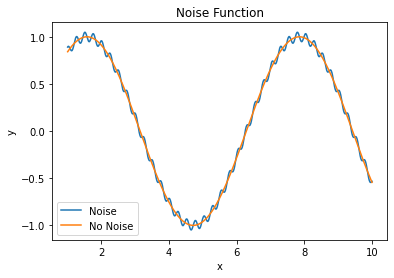

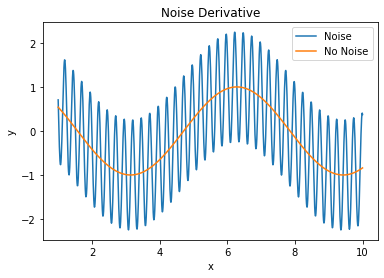

In [72]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000

x = np.linspace(1,10,n)

y = np.sin(x)

noise = 0.05*np.cos(25*x)

y_noise = y + noise

plt.figure(0)
plt.plot(x,y_noise,label='Noise')
plt.plot(x,y,label='No Noise')
plt.title('Noise Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

y_prime = np.cos(x)
noise_prime = -0.05*25*np.sin(25*x)

y_noise_prime = y_prime + noise_prime

plt.figure(1)
plt.plot(x,y_noise_prime,label='Noise')
plt.plot(x,y_prime,label='No Noise')
plt.title('Noise Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
